In [1]:
import torch
import torch.nn as nn

In [2]:
torch.manual_seed(0)

In [3]:
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = [2.05,  13.27, 14.5, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

In [4]:
x = torch.tensor(x).unsqueeze(1)
y = torch.tensor(y).unsqueeze(1)

In [5]:
model = nn.Linear(1, 1)

In [6]:
print(model.weight)
print(model.bias)

print(model(torch.zeros(1)))
print(model(torch.ones(1)) - model(torch.zeros(1)))

Parameter containing:
tensor([[-0.0075]], requires_grad=True)
Parameter containing:
tensor([0.5364], requires_grad=True)
tensor([0.5364], grad_fn=<AddBackward0>)
tensor([-0.0075], grad_fn=<SubBackward0>)


In [7]:
learning_rate = 1e-4

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
def training_loop(model, loss_fn, optimizer, n_epochs, x, y):
    for epoch in range(1, n_epochs + 1):
        ŷ = model(x)
        loss = loss_fn(ŷ, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch in {1, 2, 3, 10, 100, 1000, 10000, 100000, 200000, 300000, 400000, 500000}:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            print('    Params:', list(model.parameters()))
        if epoch in {4, 12, 101, 1001, 10001, 100001, 200001, 300001, 400001}:
            print('\n...\n')

        if not torch.isfinite(loss).all():
            break
    return

In [10]:
params = training_loop( 
    model = model,
    loss_fn = nn.MSELoss(),
    optimizer = optimizer,
    n_epochs = 400001,
    x = x, 
    y = y)

Epoch 1, Loss 183.529465
    Params: [Parameter containing:
tensor([[0.1275]], requires_grad=True), Parameter containing:
tensor([0.5385], requires_grad=True)]
Epoch 2, Loss 54.840603
    Params: [Parameter containing:
tensor([[0.1831]], requires_grad=True), Parameter containing:
tensor([0.5392], requires_grad=True)]
Epoch 3, Loss 33.031937
    Params: [Parameter containing:
tensor([[0.2060]], requires_grad=True), Parameter containing:
tensor([0.5393], requires_grad=True)]

...

Epoch 10, Loss 28.575937
    Params: [Parameter containing:
tensor([[0.2220]], requires_grad=True), Parameter containing:
tensor([0.5375], requires_grad=True)]

...

Epoch 100, Loss 28.493967
    Params: [Parameter containing:
tensor([[0.2225]], requires_grad=True), Parameter containing:
tensor([0.5103], requires_grad=True)]

...

Epoch 1000, Loss 27.688454
    Params: [Parameter containing:
tensor([[0.2273]], requires_grad=True), Parameter containing:
tensor([0.2411], requires_grad=True)]

...

Epoch 10000, Lo

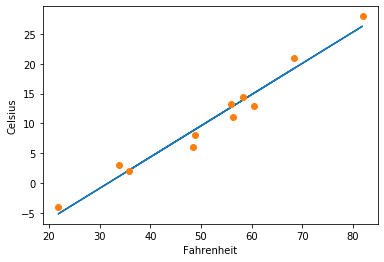

In [11]:
import numpy
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

ŷ = model(x)

fig = plt.figure()
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), ŷ.detach().numpy())
plt.plot(x.numpy(), y.numpy(), 'o')